In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import datetime
%matplotlib inline

In [2]:
raw_data = pd.read_excel("Study3-full-profiles.xlsx",sheet_name=0)


features = ['Training','Experience','Youtube','YT4L','TaskValue','Self-efficacy','AcadControl','Intrinsic','Extrinsic',
                    'EffortRegulation','Rehearsal','Organization','Elaboration','MetaSR']

feature = raw_data[['Training','Experience','Youtube','YT4L','TaskValue','Self-efficacy','AcadControl','Intrinsic','Extrinsic',
                    'EffortRegulation','Rehearsal','Organization','Elaboration','MetaSR']].dropna()
label =  raw_data[['Category']]

feature = feature.dropna(axis=0, how="any")
label = label.dropna(axis=0, how="any")

In [99]:
label['Category'].value_counts()

Inactive        160
Passive         153
Constructive    150
Name: Category, dtype: int64

In [85]:
array = feature.values 

X = array[:,0:14] 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X) 
  
# summarize transformed data 
np.set_printoptions(precision=3) 


# PCA analysis

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [86]:
x = feature.values

x = MinMaxScaler().fit_transform(x)

cc = pd.DataFrame(data = x, columns = features)


## PCA Projection to 2D

In [90]:
pca = PCA(n_components=3)

In [91]:
principalComponents = pca.fit_transform(x)

In [92]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf.head(5)

principal component 1  principal component 2  principal component 3
0              -0.541554              -0.103417               0.261576
1              -0.658908              -0.211819               0.389549
2              -0.114738              -0.384345              -0.071203
3               0.494415              -0.612555               0.195841
4               0.321173               0.017204              -0.055340

In [95]:
finalDf = pd.concat([principalDf, label], axis = 1)
finalDf

principal component 1  principal component 2  principal component 3  \
0                -0.541554              -0.103417               0.261576   
1                -0.658908              -0.211819               0.389549   
2                -0.114738              -0.384345              -0.071203   
3                 0.494415              -0.612555               0.195841   
4                 0.321173               0.017204              -0.055340   
5                 0.229958              -0.348199               0.146396   
6                -0.101671              -0.145375               0.155368   
7                -0.558301              -0.325750               0.191229   
8                 0.718754              -0.137621              -0.019989   
9                 0.715442              -0.395753              -0.220209   
10               -0.064433               0.072250               0.012367   
11                0.162002               0.296923              -0.256886   
12                1.596151               0.064589               0.075141   
13                0.593566               0.544751               0.128613   
14                0.360219               0.028827              -0.054803   
15               -0.362325              -0.236375              -0.278780   
16               -0.076355              -0.927147               0.203765   
17                0.097263              -0.282213              -0.166608   
18                0.827568              -0.306170              -0.034540   
19               -0.449882               0.216567              -0.384993   
20                0.135071               0.075460              -0.319843   
21                0.659282              -0.133134               0.472372   
22                0.115441              -0.158359               0.029941   
23                0.049098              -0.029486               0.040966   
24               -0.012404               0.083643              -0.158456   
25                0.100300               0.082192               0.270127   
26                0.119097              -0.766713              -0.094507   
27               -0.056319               0.688068              -0.237432   
28                0.538649               0.394226               0.252844   
29               -0.493301              -0.050111               0.103947   
..                     ...                    ...                    ...   
433              -0.648415              -0.061411              -0.294256   
434               0.053621               0.301479              -0.128133   
435               0.303455              -0.533005               0.324159   
436              -0.184891              -0.748384              -0.396511   
437              -0.214038              -0.004772               0.368046   
438              -0.336184               0.380399              -0.169425   
439              -0.035301               0.219177              -0.175776   
440              -0.434127              -0.534653              -0.285133   
441               0.208118               0.394652              -0.206920   
442               0.131510              -0.389540              -0.024673   
443               0.000590              -0.032883               0.000163   
444              -0.329453              -0.175756              -0.297046   
445               0.326285               0.225002              -0.169542   
446              -0.430892               0.249740              -0.035089   
447               0.098626               0.138766              -0.127112   
448              -0.259213               0.119839               0.020741   
449              -0.280440              -0.133266              -0.023083   
450              -0.117982              -0.484243               0.480620   
451               0.324279               0.608191               0.015058   
452               0.188493               0.144505               1.244155   
453               0.171630               0.079879    

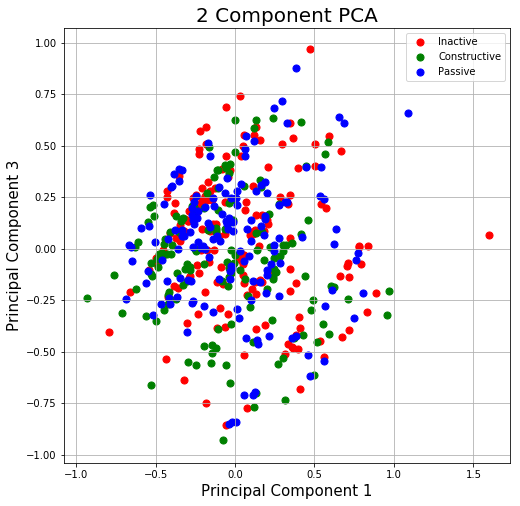

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Inactive', 'Constructive', 'Passive']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [56]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3)

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

## MultinomialNB

In [41]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()

bayes.fit(X_train, y_train.values.ravel())

bayes_predict_labels = bayes.predict(X_test)

result = sum(bayes_predict_labels == y_test.values.ravel())

acc_MulNB = (result/y_test.shape[0]) * 100

print(result)

print("Accuracy : ",round(acc_MulNB,2),"%")


44
Accuracy :  31.65 %


In [42]:
confusion_matrix(y_test.values.ravel(),bayes_predict_labels)

array([[ 3, 38,  4],
       [ 4, 37,  5],
       [ 3, 41,  4]], dtype=int64)

In [43]:
print(classification_report(y_test.values.ravel(),bayes_predict_labels))

              precision    recall  f1-score   support

Constructive       0.30      0.07      0.11        45
    Inactive       0.32      0.80      0.46        46
     Passive       0.31      0.08      0.13        48

 avg / total       0.31      0.32      0.23       139



In [44]:
starttime = datetime.datetime.now()

cross_val_mulNB = cross_val_score(bayes, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for MultinomialNB: ",round(cross_val_mulNB.mean() * 100 , 2),"%")

endtime = datetime.datetime.now()
print("Runnning time: ",(endtime - starttime).seconds, 'seconds')

Cross Validation Accuracy for MultinomialNB:  35.88 %
Runnning time:  5 seconds


## RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf_predict_labels = rf.predict(X_test)

resultRandom = sum(rf_predict_labels == y_test.values.ravel())

acc_RandomForest = (resultRandom/y_test.shape[0]) * 100

print(resultRandom)

print("Accuracy : ",round(acc_RandomForest,2),"%")

47
Accuracy :  33.81 %


In [46]:
confusion_matrix(y_test.values.ravel(),rf_predict_labels)

array([[19, 16, 10],
       [13, 15, 18],
       [21, 14, 13]], dtype=int64)

In [47]:
print(classification_report(y_test.values.ravel(),rf_predict_labels))

              precision    recall  f1-score   support

Constructive       0.36      0.42      0.39        45
    Inactive       0.33      0.33      0.33        46
     Passive       0.32      0.27      0.29        48

 avg / total       0.34      0.34      0.34       139



In [49]:
starttime = datetime.datetime.now()

cross_val_RandomForest = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for RandomForest: ",round(cross_val_RandomForest.mean() * 100 , 2),"%")

endtime = datetime.datetime.now()
print("Runnning time: ",(endtime - starttime).seconds, 'seconds')

Cross Validation Accuracy for RandomForest:  41.18 %
Runnning time:  6 seconds


## BernoulliNB

In [50]:
from sklearn.naive_bayes import BernoulliNB

bayesNB = BernoulliNB()

bayesNB.fit(X_train,  y_train.values.ravel())

bayes_predict_NB = bayesNB.predict(X_test)

resultBNB = sum(bayes_predict_NB == y_test.values.ravel())

acc_RandomBNB = (resultBNB/y_test.shape[0]) * 100

print(resultBNB)

print("Accuracy : ",round(acc_RandomBNB,2),"%")

48
Accuracy :  34.53 %


In [51]:
confusion_matrix(y_test.values.ravel(),bayes_predict_NB)

array([[32, 12,  1],
       [31, 14,  1],
       [33, 13,  2]], dtype=int64)

In [52]:
print(classification_report(y_test.values.ravel(),bayes_predict_NB))

              precision    recall  f1-score   support

Constructive       0.33      0.71      0.45        45
    Inactive       0.36      0.30      0.33        46
     Passive       0.50      0.04      0.08        48

 avg / total       0.40      0.35      0.28       139



In [53]:
starttime = datetime.datetime.now()

cross_val_BNB = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for BernoulliNB: ",round(cross_val_BNB.mean() * 100 , 2),"%")

endtime = datetime.datetime.now()
print("Runnning time: ",(endtime - starttime).seconds, 'seconds')

Cross Validation Accuracy for BernoulliNB:  37.61 %
Runnning time:  6 seconds


## SVM

In [57]:
from sklearn.svm import SVC

support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,  y_train.values.ravel())

y_pred_svc = support_vector_classifier.predict(X_test)

resultSVC = sum(y_pred_svc == y_test.values.ravel())

acc_SVM = (resultSVC/y_test.shape[0]) * 100

print("Accuracy : ",round(acc_SVM,2),"%")

Accuracy :  28.78 %


In [58]:
confusion_matrix(y_test.values.ravel(),y_pred_svc)

array([[ 5, 11, 29],
       [ 6, 19, 26],
       [ 8, 19, 16]], dtype=int64)

In [59]:
print(classification_report(y_test.values.ravel(),y_pred_svc))

              precision    recall  f1-score   support

Constructive       0.26      0.11      0.16        45
    Inactive       0.39      0.37      0.38        51
     Passive       0.23      0.37      0.28        43

 avg / total       0.30      0.29      0.28       139



In [60]:
starttime = datetime.datetime.now()

cross_val_SVM = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for SVM: ",round(cross_val_SVM.mean() * 100 , 2),"%")

endtime = datetime.datetime.now()
print("Runnning time: ",(endtime - starttime).seconds, 'seconds')

Cross Validation Accuracy for SVM:  35.83 %
Runnning time:  6 seconds


In [ ]:
# SVM:           35.83% precision = 0.30 recall 0.29
# RandomForest :  41.18% precision = 0.34 recall 0.24
# BernoulliNB: 37.61 %  precision = 0.40 recall 0.35
# MultinomialNB: 35.88% precision = 0.31 recall 0.32

In [83]:
import matplotlib.pyplot as plt
 
name_list = ['SVM','RandomForest','BernoulliNB','MultinomialNB']
num_list = [0.358,0.412,0.376,0.359]
num_list1 = [0.30,0.34,0.40,0.31]
num_list2 = [0.29,0.24,0.35,0.32]

x = np.arange(4)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.figure(figsize=(9,5))

plt.bar(x, num_list, width=width, label='Accuracy',fc = 'lightblue')

plt.bar(x+width, num_list1, width=width, label='Precision',tick_label = num_list,fc = 'r')
    
plt.bar(x+2*width, num_list2, width=width, label='Recall',tick_label = num_list1,fc = 'lightgreen')

plt.xticks( np.arange(4), ('SVM','RandomForest','BernoulliNB','MultinomialNB') )

plt.legend()
plt.grid()
plt.show()
